In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
import unicodedata

In [ ]:
df = pd.read_csv('/content/drive/My Drive/gender project/Gender-prediction(all).csv',error_bad_lines=False)
df

,Full Name,Gender
0,শ্বরিয়া ঘোষ,নারী
1,শিকা খায়ের এশা,নারী
2,এশা ধর,নারী
3,শিতা সুর আপন,নারী
4,র্মি সেন,নারী
...,...,...
5743,হোসেন বেপারি,পুরুষ
5744,হ্যান্ডরি জিতু,পুরুষ
5745,হ্যাপি আক্তার,নারী
5746,হ্যাপি রিচিল,নারী


In [ ]:
df.isnull().sum()

Full Name    0
Gender       0
dtype: int64

In [ ]:
df['Gender'].value_counts()

নারী     2911
পুরুষ    2837
Name: Gender, dtype: int64

In [ ]:
df['Gender'].unique()

array(['নারী', 'পুরুষ'], dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split

X = df['Full Name']  
y = df['Gender']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()

X_train_counts = count_vect.fit_transform(X_train)
X_train_counts.shape

(4598, 816)

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()

X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(4598, 816)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

X_train_tfidf = vectorizer.fit_transform(X_train) 
X_train_tfidf.shape

(4598, 816)

In [ ]:
 y_test.shape, X_test.shape,X_train.shape,y_train.shape

((1150,), (1150,), (4598,), (4598,))

In [ ]:

from sklearn.svm import LinearSVC
clf = LinearSVC()
clf.fit(X_train_tfidf,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [ ]:
from sklearn.pipeline import Pipeline
text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LinearSVC()),
])
text_clf.fit(X_train, y_train) 

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
               

[[337 206]
 [163 444]]


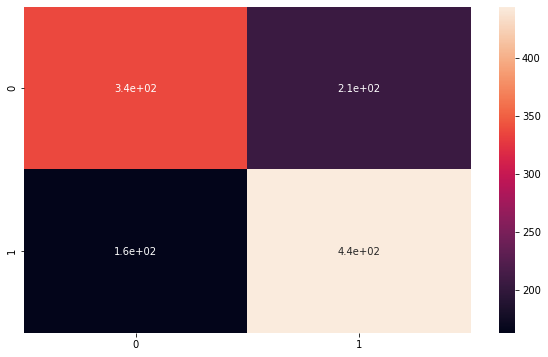

In [ ]:
predictions = text_clf.predict(X_test)
from sklearn import metrics
cf_matrix=metrics.confusion_matrix(y_test,predictions)
print(cf_matrix)
plt.figure(figsize=(10,6))  
sns.heatmap(cf_matrix, annot=True )

In [ ]:
print(metrics.classification_report(y_test,predictions))
print(metrics.accuracy_score(y_test,predictions))

              precision    recall  f1-score   support

        নারী       0.67      0.62      0.65       543
       পুরুষ       0.68      0.73      0.71       607

    accuracy                           0.68      1150
   macro avg       0.68      0.68      0.68      1150
weighted avg       0.68      0.68      0.68      1150

0.6791304347826087


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(X_train_tfidf,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
from sklearn.pipeline import Pipeline

text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', KNeighborsClassifier()),
])
text_clf.fit(X_train, y_train) 

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,

[[396 147]
 [273 334]]


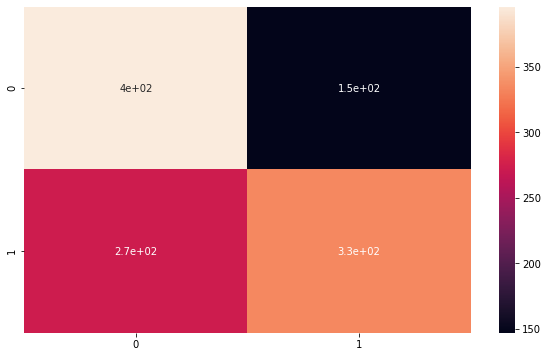

In [ ]:
predictions = text_clf.predict(X_test)
from sklearn import metrics
cf_matrix=metrics.confusion_matrix(y_test,predictions)
print(cf_matrix)
plt.figure(figsize=(10,6))  
sns.heatmap(cf_matrix, annot=True )

In [ ]:
print(metrics.classification_report(y_test,predictions))
print(metrics.accuracy_score(y_test,predictions))

              precision    recall  f1-score   support

        নারী       0.59      0.73      0.65       543
       পুরুষ       0.69      0.55      0.61       607

    accuracy                           0.63      1150
   macro avg       0.64      0.64      0.63      1150
weighted avg       0.65      0.63      0.63      1150

0.6347826086956522


In [ ]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train_tfidf,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
from sklearn.pipeline import Pipeline

text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', SVC()),
])
text_clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', deg

[[327 216]
 [155 452]]


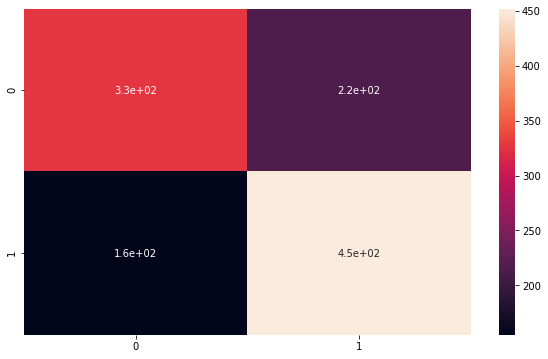

In [ ]:
predictions = text_clf.predict(X_test)
from sklearn import metrics
cf_matrix=metrics.confusion_matrix(y_test,predictions)
print(cf_matrix)
plt.figure(figsize=(10,6))  
sns.heatmap(cf_matrix, annot=True )

In [ ]:
print(metrics.classification_report(y_test,predictions))
print(metrics.accuracy_score(y_test,predictions))

              precision    recall  f1-score   support

        নারী       0.68      0.60      0.64       543
       পুরুষ       0.68      0.74      0.71       607

    accuracy                           0.68      1150
   macro avg       0.68      0.67      0.67      1150
weighted avg       0.68      0.68      0.68      1150

0.6773913043478261


In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train_tfidf,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
from sklearn.pipeline import Pipeline

text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LogisticRegression()),
])
text_clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling

[[335 208]
 [156 451]]


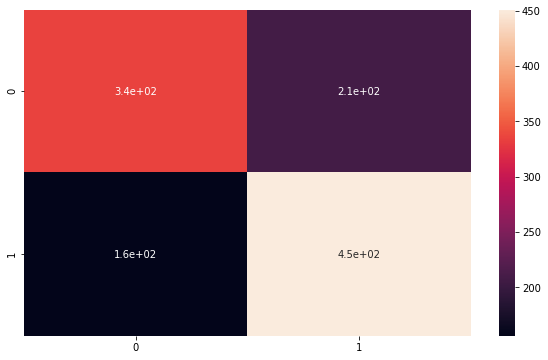

In [ ]:
predictions = text_clf.predict(X_test)
from sklearn import metrics
cf_matrix=metrics.confusion_matrix(y_test,predictions)
print(cf_matrix)
plt.figure(figsize=(10,6))  
sns.heatmap(cf_matrix, annot=True )

In [ ]:
print(metrics.classification_report(y_test,predictions))
print(metrics.accuracy_score(y_test,predictions))

              precision    recall  f1-score   support

        নারী       0.68      0.62      0.65       543
       পুরুষ       0.68      0.74      0.71       607

    accuracy                           0.68      1150
   macro avg       0.68      0.68      0.68      1150
weighted avg       0.68      0.68      0.68      1150

0.6834782608695652


In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train_tfidf,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
from sklearn.pipeline import Pipeline

text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf',RandomForestClassifier()),
])
text_clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None

[[423 120]
 [289 318]]


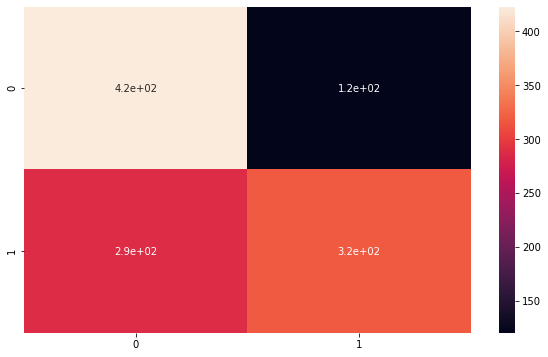

In [ ]:
predictions = text_clf.predict(X_test)
from sklearn import metrics
cf_matrix=metrics.confusion_matrix(y_test,predictions)
print(cf_matrix)
plt.figure(figsize=(10,6))  
sns.heatmap(cf_matrix, annot=True )

In [ ]:
print(metrics.classification_report(y_test,predictions))
print(metrics.accuracy_score(y_test,predictions))

              precision    recall  f1-score   support

        নারী       0.59      0.78      0.67       543
       পুরুষ       0.73      0.52      0.61       607

    accuracy                           0.64      1150
   macro avg       0.66      0.65      0.64      1150
weighted avg       0.66      0.64      0.64      1150

0.6443478260869565


In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train_tfidf,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
from sklearn.pipeline import Pipeline

text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf',DecisionTreeClassifier()),
])
text_clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=None,
               

[[346 197]
 [185 422]]


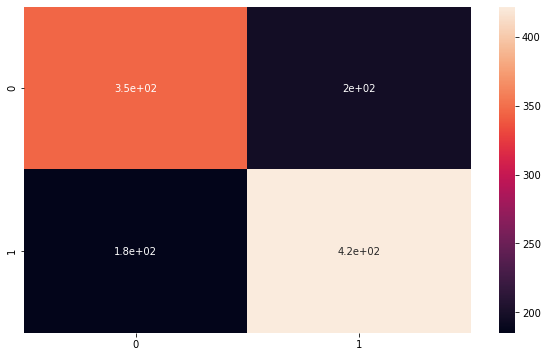

In [ ]:
predictions = text_clf.predict(X_test)
from sklearn import metrics
cf_matrix=metrics.confusion_matrix(y_test,predictions)
print(cf_matrix)
plt.figure(figsize=(10,6))  
sns.heatmap(cf_matrix, annot=True )

In [ ]:
print(metrics.classification_report(y_test,predictions))
print(metrics.accuracy_score(y_test,predictions))

              precision    recall  f1-score   support

        নারী       0.65      0.64      0.64       543
       পুরুষ       0.68      0.70      0.69       607

    accuracy                           0.67      1150
   macro avg       0.67      0.67      0.67      1150
weighted avg       0.67      0.67      0.67      1150

0.6678260869565218


In [ ]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier()
clf.fit(X_train_tfidf,y_train)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
from sklearn.pipeline import Pipeline

text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf',SGDClassifier()),
])
text_clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
           

[[337 206]
 [164 443]]


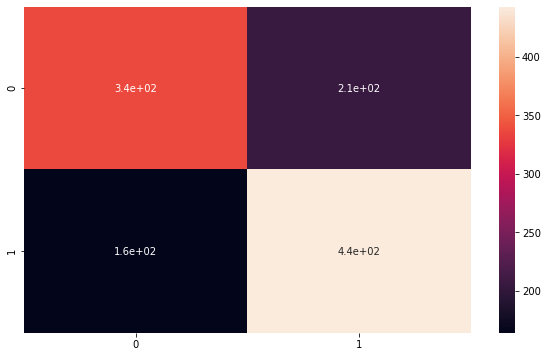

In [ ]:
predictions = text_clf.predict(X_test)
from sklearn import metrics
cf_matrix=metrics.confusion_matrix(y_test,predictions)
print(cf_matrix)
plt.figure(figsize=(10,6))  
sns.heatmap(cf_matrix, annot=True )

In [ ]:
print(metrics.classification_report(y_test,predictions))
print(metrics.accuracy_score(y_test,predictions))

              precision    recall  f1-score   support

        নারী       0.67      0.62      0.65       543
       পুরুষ       0.68      0.73      0.71       607

    accuracy                           0.68      1150
   macro avg       0.68      0.68      0.68      1150
weighted avg       0.68      0.68      0.68      1150

0.6782608695652174


In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train_tfidf,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
from sklearn.pipeline import Pipeline

text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf',MultinomialNB()),
])
text_clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

[[424 119]
 [282 325]]


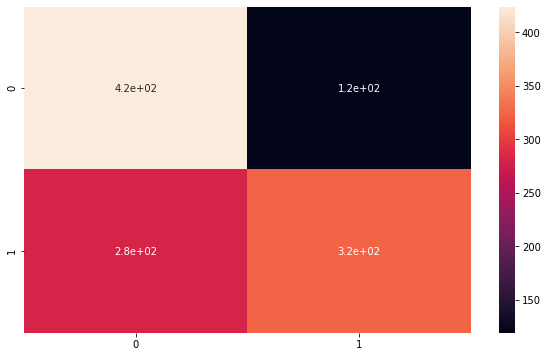

In [ ]:
predictions = text_clf.predict(X_test)
from sklearn import metrics
cf_matrix=metrics.confusion_matrix(y_test,predictions)
print(cf_matrix)
plt.figure(figsize=(10,6))  
sns.heatmap(cf_matrix, annot=True )

In [ ]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

        নারী       0.60      0.78      0.68       543
       পুরুষ       0.73      0.54      0.62       607

    accuracy                           0.65      1150
   macro avg       0.67      0.66      0.65      1150
weighted avg       0.67      0.65      0.65      1150



In [ ]:
print(metrics.accuracy_score(y_test,predictions))

0.6513043478260869
